### **MANOSWITA BOSE**
### **(2347238)**

## **ADVANCED DATA ANALYTICS (MCA472A) - ETE-3 COMPONENT**

The heart dataset is a multivaraitate dataset that contains information about heart disease patients. It has **13** features and **1** target variable, with the first column being the **age** of the patient, the second column indicating the **sex** (1 for male, 0 for female), and the remaining columns representing various features related to heart disease diagnosis and treatmentm which are as follows:

1. **cp**: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
2. **trestbps**: Resting blood pressure (in mm Hg)
3. **chol**: Serum cholesterol (in mg/dl)
4. **fbs**: Fasting blood sugar (1 = true, 0 = false)
5. **restecg**: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
6. **thalach**: Maximum heart rate achieved
7. **exang**: Exercise-induced angina (1 = yes, 0 = no)
8. **oldpeak**: ST depression induced by exercise relative to rest
9. **slope**: Slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
10. **ca**: Number of major vessels colored by fluoroscopy
11. **thal**: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)
12. **target**: Diagnosis of heart disease (1 = true, 0 = false)

The dataset contains **303** instances, which means it includes information about 303 patients. The values in each column represent the respective feature values for each patient.

In [1]:
# Importing all the necessary libraries into the workspace

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Suppressing warnings for cleaner output
warnings.filterwarnings('ignore')

### **Data Loading**

In [3]:
# Loading the CSV data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [4]:
# Printing the first few rows of the dataset
print("Dataset Overview:\n", heart_data.head())

Dataset Overview:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
# Printing the last few rows of the dataset
heart_data.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [6]:
# Counting the number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [7]:
# Getting some information about the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Statistical measures about the data
heart_data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### **Exploratory Data Analysis**

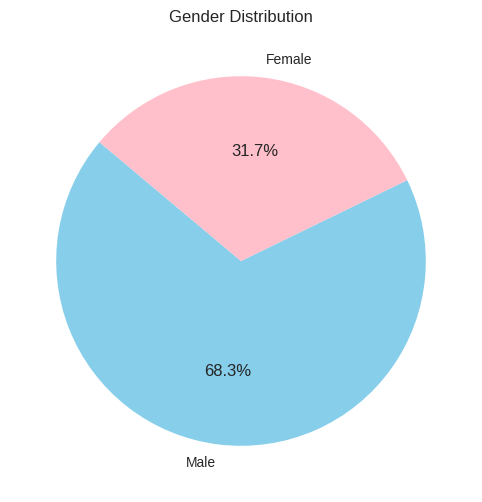

In [9]:
# Count of males and females
gender_count = heart_data['sex'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_count, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=140)
plt.title('Gender Distribution')
plt.show()

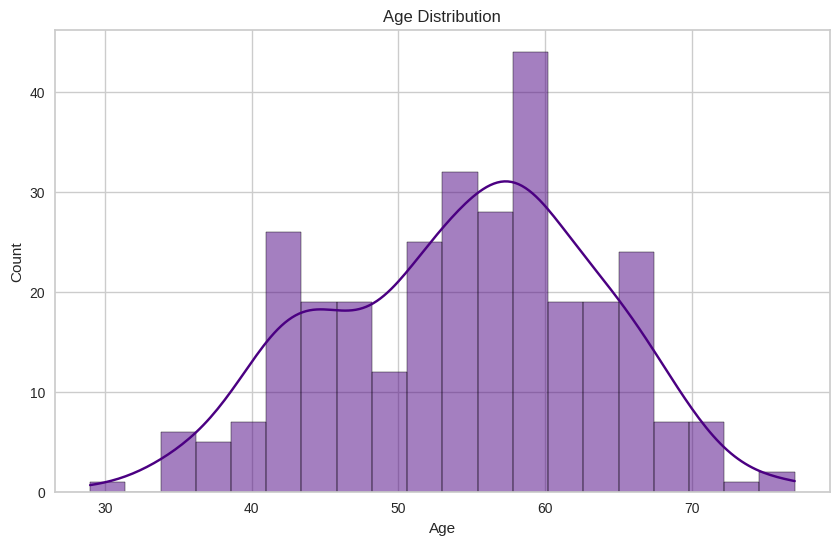

In [10]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(heart_data['age'], bins=20, kde=True, color='indigo')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

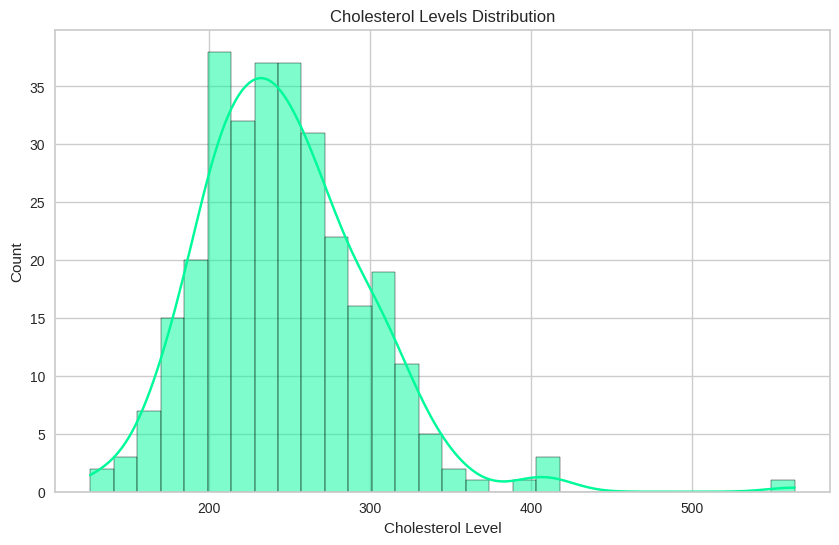

In [11]:
# Cholesterol distribution
plt.figure(figsize=(10, 6))
sns.histplot(heart_data['chol'], bins=30, kde=True, color='mediumspringgreen')
plt.title('Cholesterol Levels Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

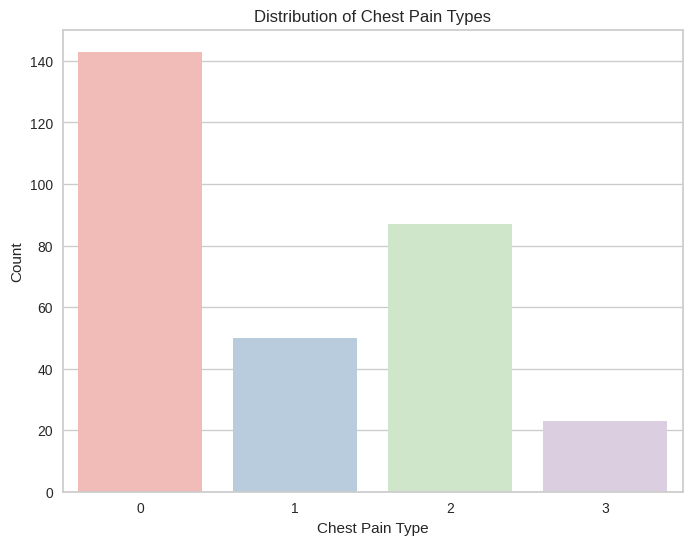

In [12]:
# Count of different chest pain types
cp_count = heart_data['cp'].value_counts()

# Bar plot for chest pain types
plt.figure(figsize=(8, 6))
sns.barplot(x=cp_count.index, y=cp_count.values, palette='Pastel1')
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

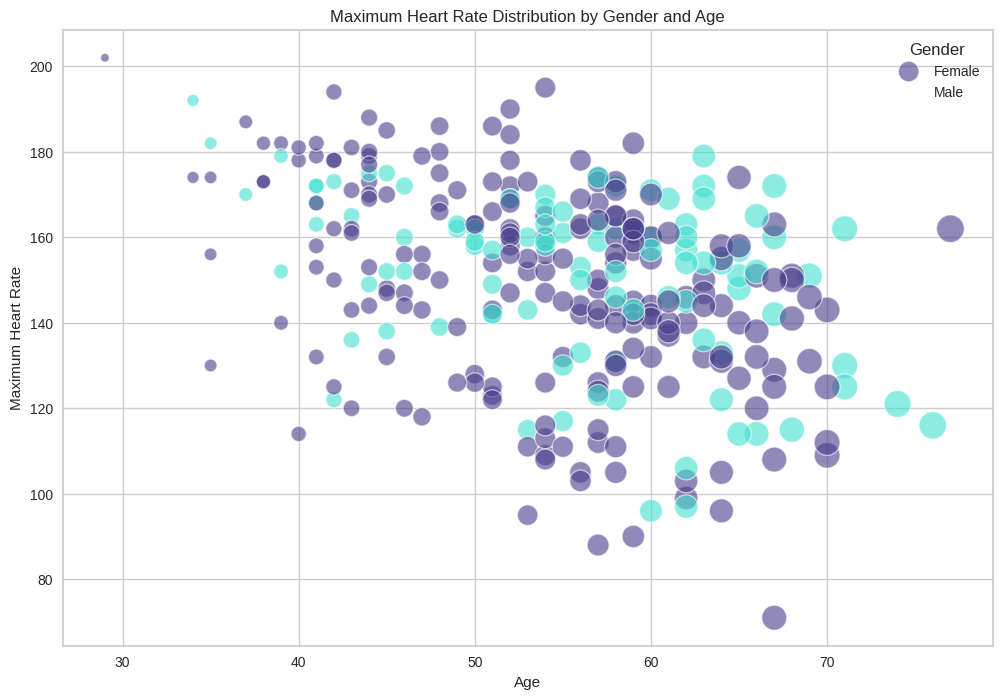

In [84]:
# Maximum Heart Rate distribution by Gender and Age
plt.figure(figsize=(12, 8))

sns.scatterplot(x='age', y='thalach', hue='sex', size='age', sizes=(40, 400), data=heart_data, palette=['turquoise', 'darkslateblue'], alpha=0.6)

# Plot details
plt.title('Maximum Heart Rate Distribution by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

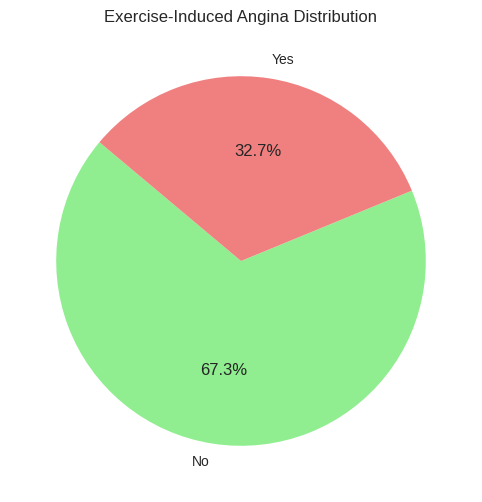

In [13]:
# Count of exercise-induced angina
angina_count = heart_data['exang'].value_counts()

# Pie chart for exercise-induced angina
plt.figure(figsize=(8, 6))
plt.pie(angina_count, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=140)
plt.title('Exercise-Induced Angina Distribution')
plt.show()

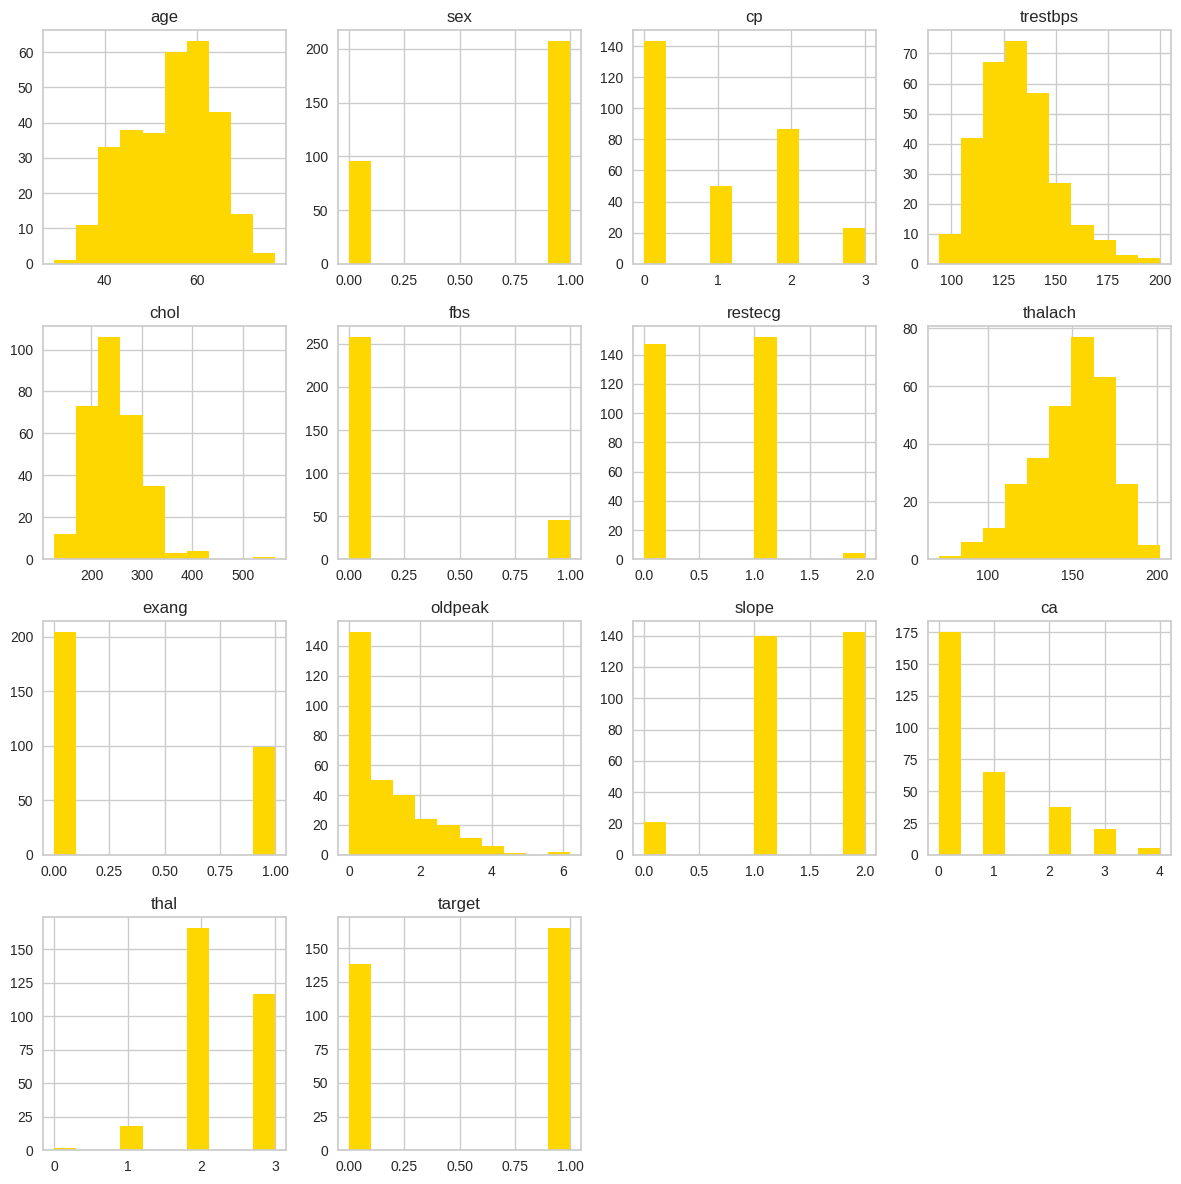

In [14]:
# Histograms for all features
heart_data.hist(figsize=(12, 12), color='gold')
plt.tight_layout()
plt.show()

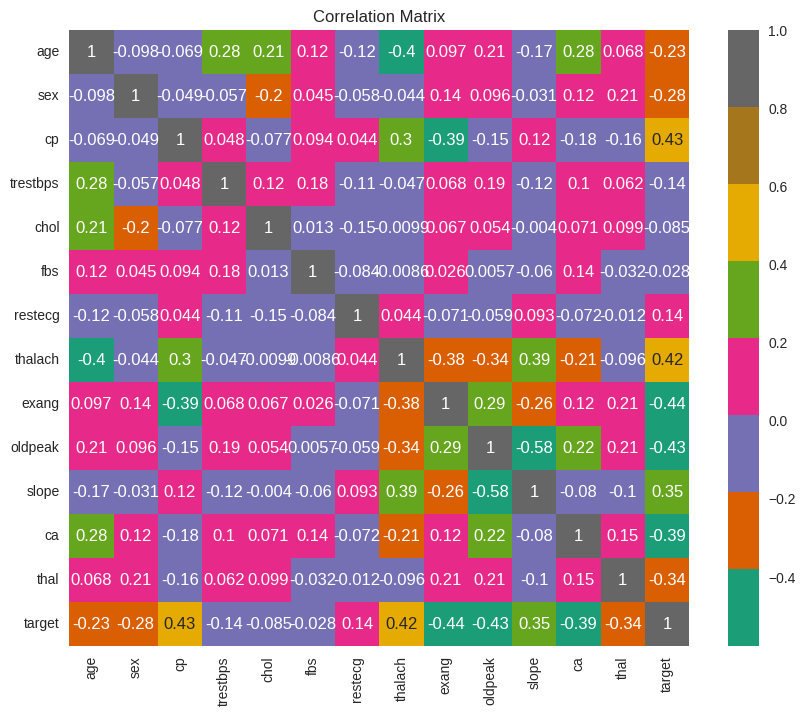

In [15]:
# Correlation matrix
corr_matrix = heart_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Dark2')
plt.title('Correlation Matrix')
plt.show()

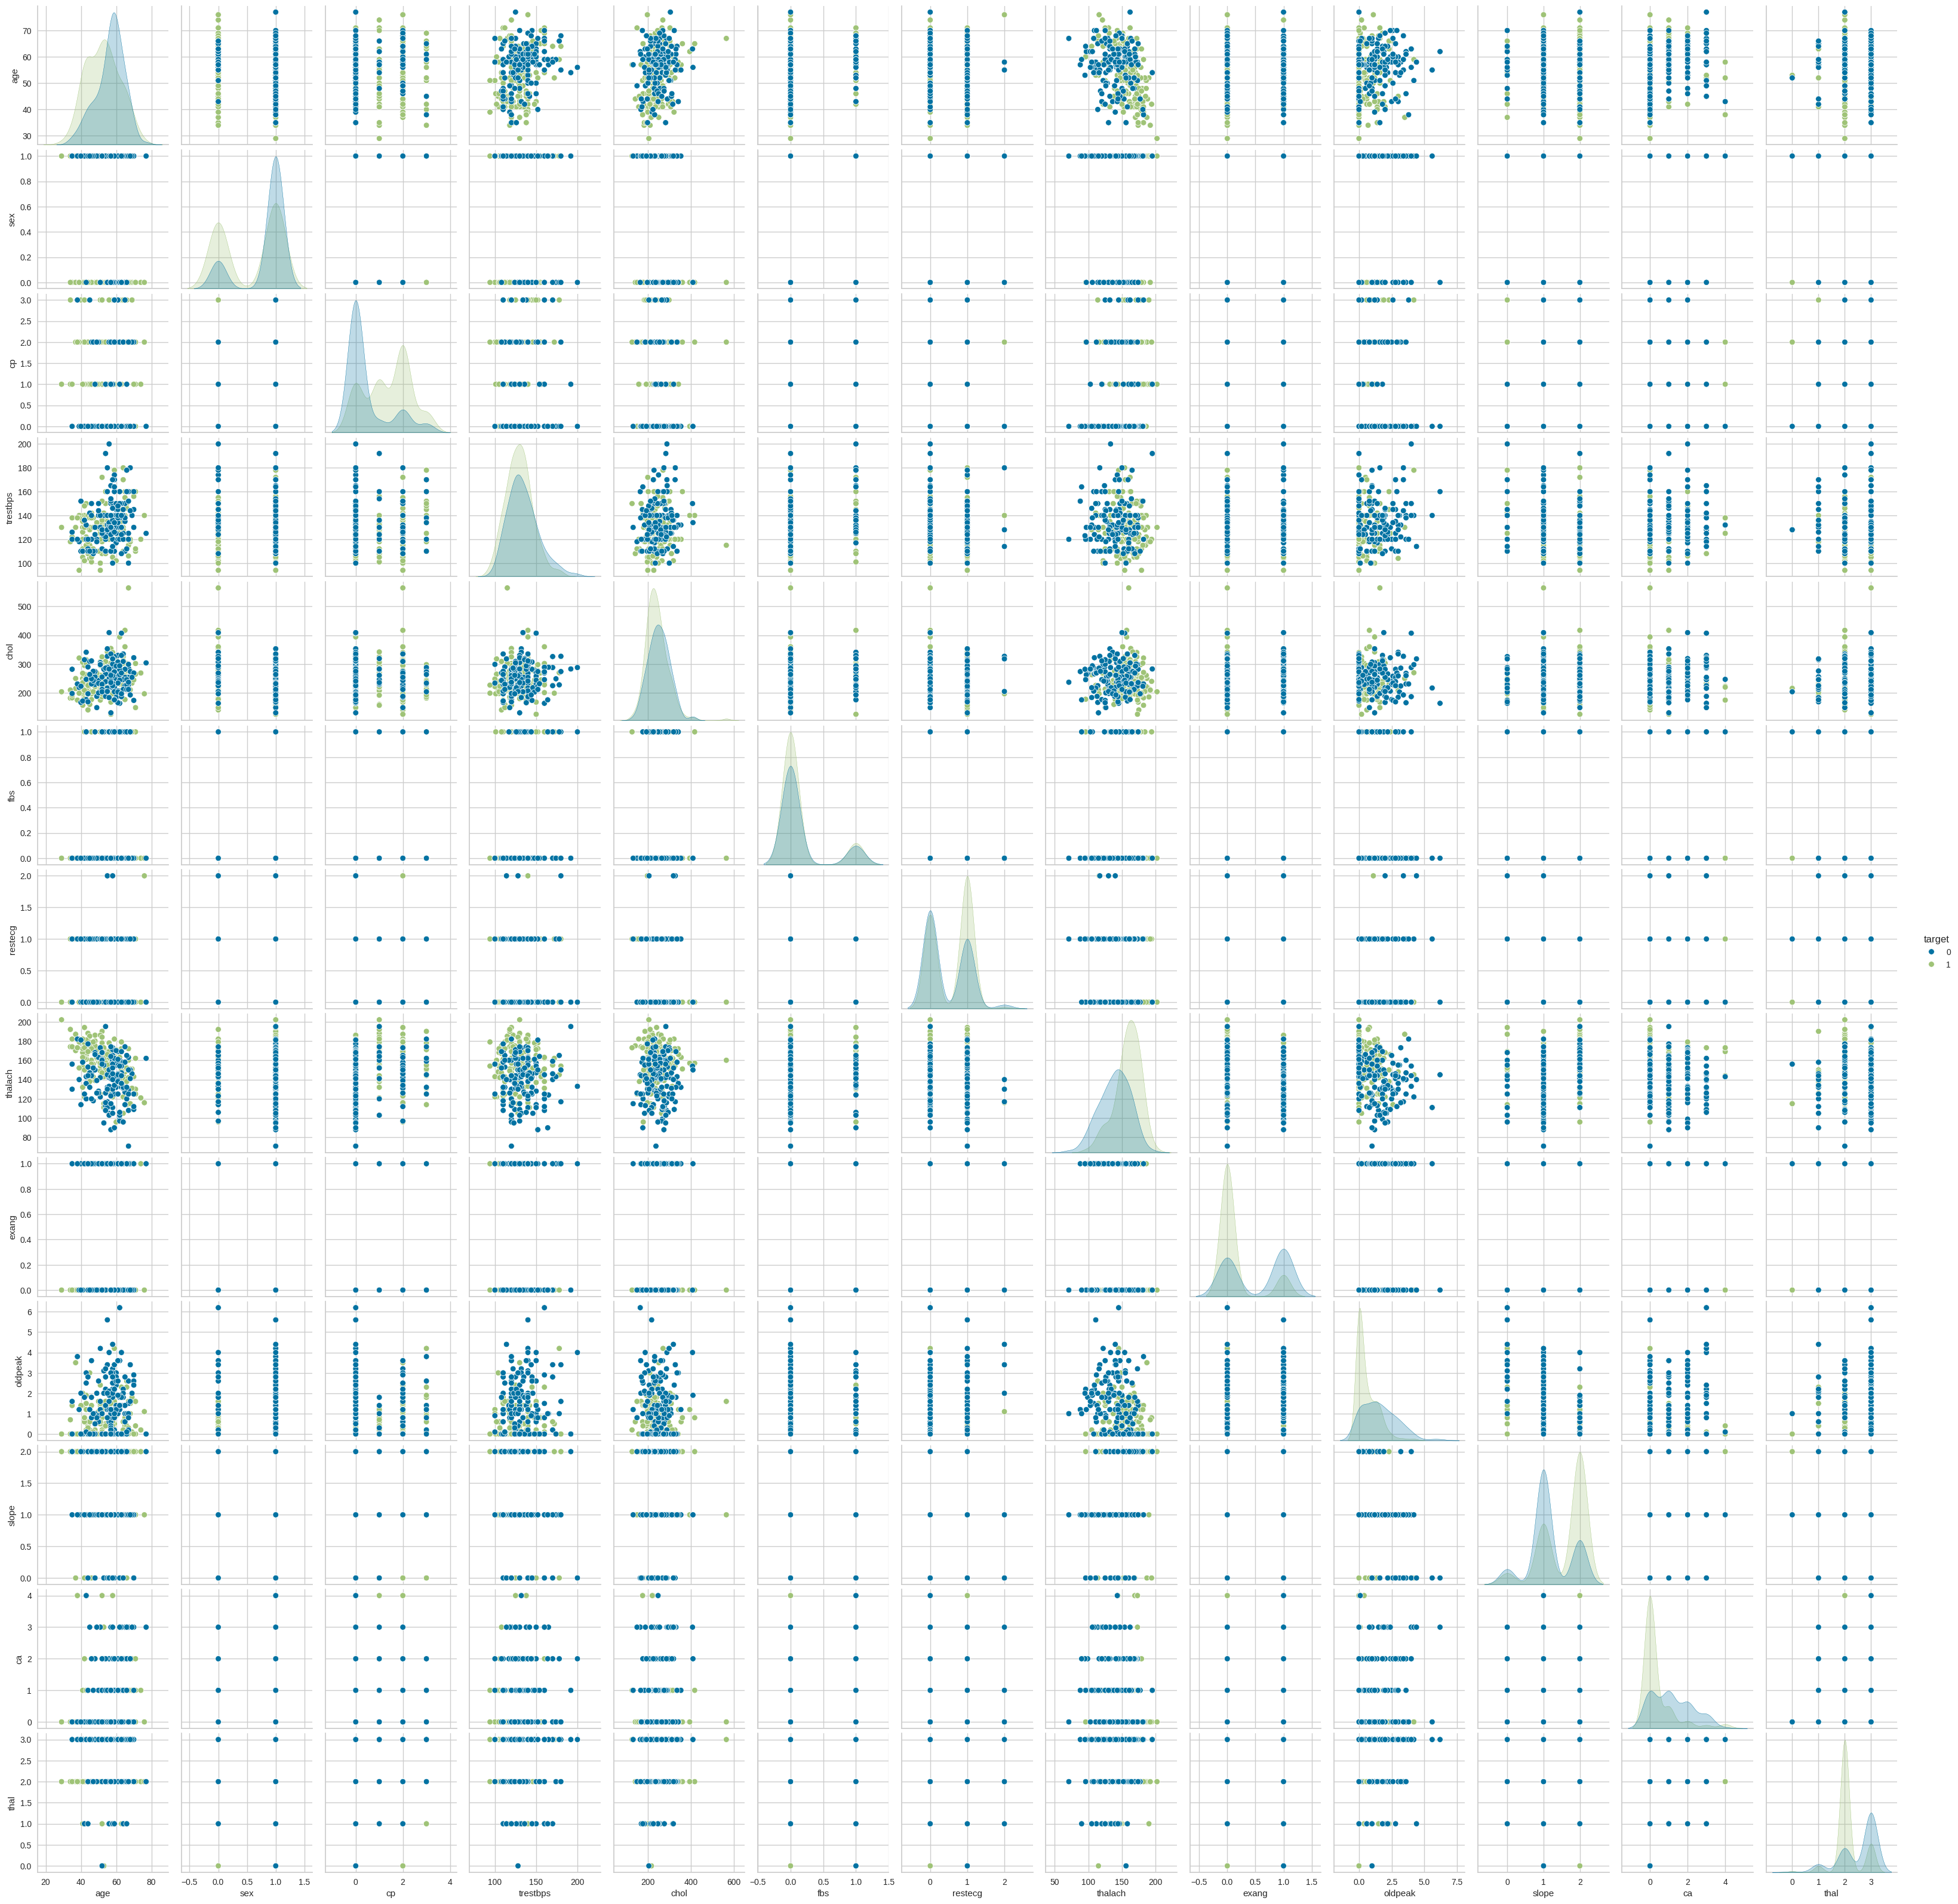

In [16]:
# Pairplot to see relationships between features
sns.pairplot(heart_data, hue='target')
plt.show()

### **Dataset Preprocessing**

In [17]:
# Checking for missing values in the dataset
print(heart_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [18]:
# Defining custom colors
box_color = '#f30b98'  # Color for the box
median_color = '#06ced4'  # Color for the median line
flier_color = '#d62728'  # Color for the outliers (fliers)

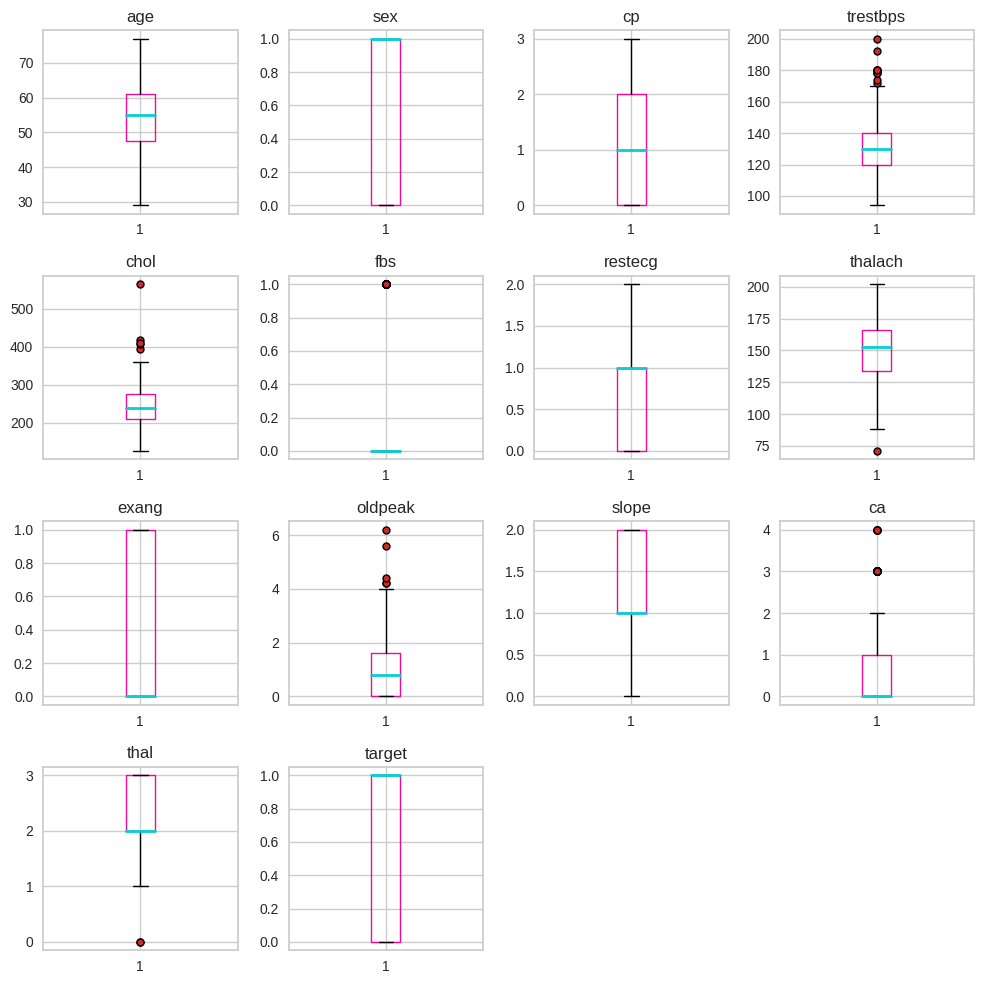

In [19]:
# Plotting box plots for all features
plt.figure(figsize=(10, 10))

for i, column in enumerate(heart_data.columns, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(
        heart_data[column],
        boxprops=dict(color=box_color),
        medianprops=dict(color=median_color, linewidth=2),
        flierprops=dict(marker='o', markerfacecolor=flier_color, markersize=5)
    )
    plt.title(column)

plt.tight_layout()
plt.show()

No missing values found, so no further preprocessing is required in this case.

In [20]:
# Handling outliers (using IQR method)
Q1 = heart_data.quantile(0.25)
Q3 = heart_data.quantile(0.75)
IQR = Q3 - Q1
df_outliers_removed = heart_data[~((heart_data < (Q1 - 1.5 * IQR)) | (heart_data > (Q3 + 1.5 * IQR))).any(axis=1)]

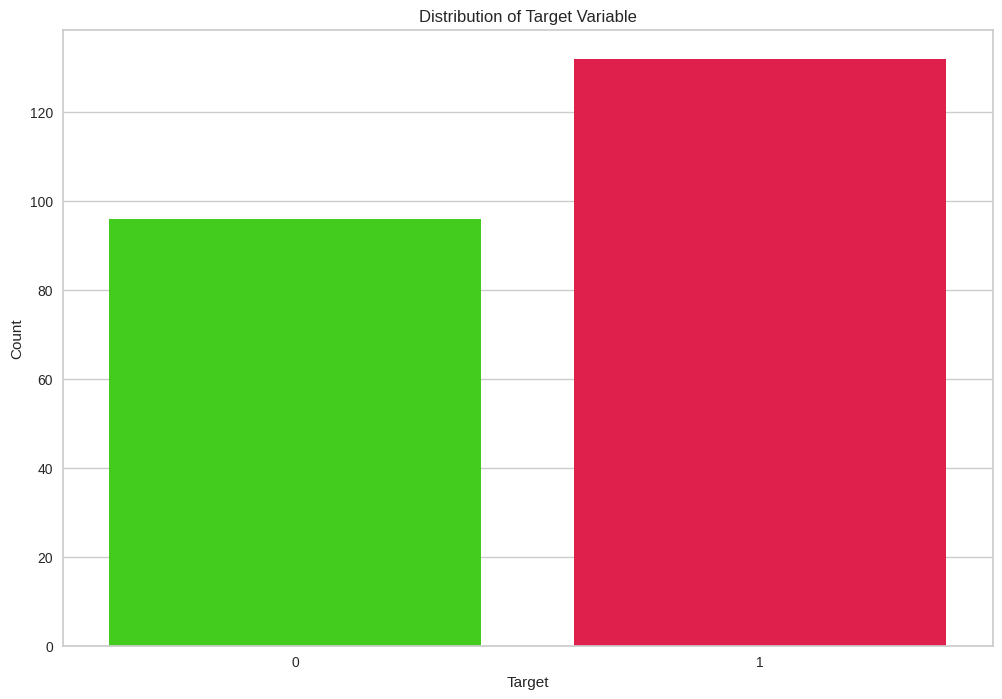

In [21]:
# Visualizing the distributions of features with different colors for each bar
plt.figure(figsize=(12, 8))
sns.countplot(x='target', data=df_outliers_removed, palette='prism')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [22]:
# Checking the distribution of the Target Variable
df_outliers_removed['target'].value_counts()

target
1    132
0     96
Name: count, dtype: int64

For this dataset, we can conclude that **0** represents the count of patients with a defective heart (which is **96** in total) while **1** represents the count of patients with a healthy heart (which is **132** in total). The remaining have been removed since they are all outliers.

In [23]:
# Separating features (X) and target variable (Y)
X = df_outliers_removed.drop('target', axis=1)
Y = df_outliers_removed['target']

In [24]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(228, 13) (182, 13) (46, 13)


In [26]:
print(Y.shape, Y_train.shape, Y_test.shape)

(228,) (182,) (46,)


In [27]:
# Standardizing the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 1. The **accuracy** of the model tells us the proportion of correctly classified instances out of all instances. In this case, however, it represents the overall performance of the model.

2. The **classification report** provides metrics such as precision, recall, F1-score, and support for each class (0 and 1). It gives us a more detailed understanding of how well the model performs for each class.

3. The **confusion matrix** shows the number of true positive, true negative, false positive, and false negative predictions. It helps us understand the types of errors the model is making.

The **ROC curve** plots the trade-off between the true positive rate (sensitivity), which measures the model's ability to correctly identify patients with heart disease, and the false positive rate (1-specificity), which represents the rate of incorrectly classifying patients without heart disease as positive. A curve that hugs the upper left corner of the plot indicates better model performance, with higher sensitivity and lower false positive rate, resulting in a higher area under the ROC curve (AUC). The AUC quantifies the overall discriminative ability of the Random Forest Classifier, providing a single metric for evaluating its performance.

## **Classification using Logistic Regression**

> **Logistic Regression** is a statistical method used for binary classification tasks. It models the probability that a given input belongs to a particular class by fitting a logistic function to the data. This model outputs a probability value between 0 and 1, which is then thresholded to make binary decisions. Logistic Regression is widely used for its simplicity, interpretability, and efficiency, especially in cases where the relationship between the features and the target variable is approximately linear.

### **Model Training**

In [28]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [29]:
log_pred = log_model.predict(X_test)
log_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

### **Model Evaluation**

In [30]:
# Evaluating the model
log_accuracy = accuracy_score(Y_test, log_pred)
log_precision = precision_score(Y_test, log_pred)
log_recall = recall_score(Y_test, log_pred)
log_f1 = f1_score(Y_test, log_pred)
log_roc_auc = roc_auc_score(Y_test, log_pred_proba)

print("\nLogistic Regression Metrics:")
print(f"Accuracy: {log_accuracy:.4f}, Precision: {log_precision:.4f}, Recall: {log_recall:.4f}, F1 Score: {log_f1:.4f}, ROC-AUC: {log_roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, log_pred))


Logistic Regression Metrics:
Accuracy: 0.6522, Precision: 0.6364, Recall: 0.8400, F1 Score: 0.7241, ROC-AUC: 0.9105

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.43      0.53        21
           1       0.64      0.84      0.72        25

    accuracy                           0.65        46
   macro avg       0.66      0.63      0.63        46
weighted avg       0.66      0.65      0.64        46

Confusion Matrix:
 [[ 9 12]
 [ 4 21]]


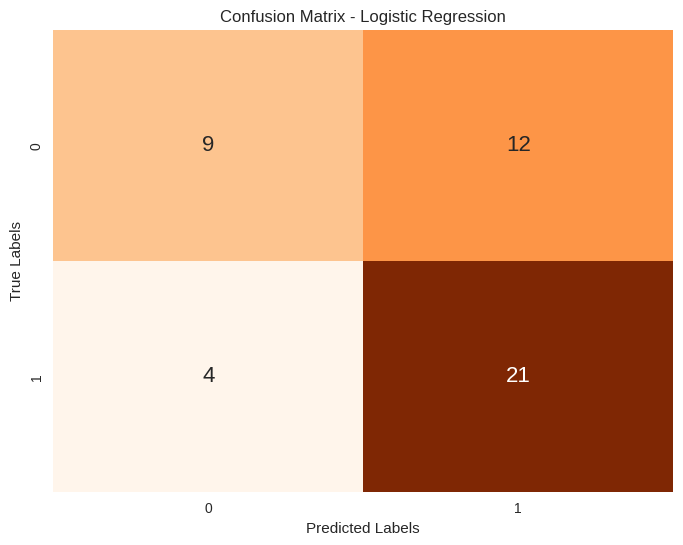

In [31]:
# Confusion Matrix Plot
cm = confusion_matrix(Y_test, log_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [32]:
coefficients = log_model.coef_[0]
features = X.columns

# Creating a DataFrame for easier plotting
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

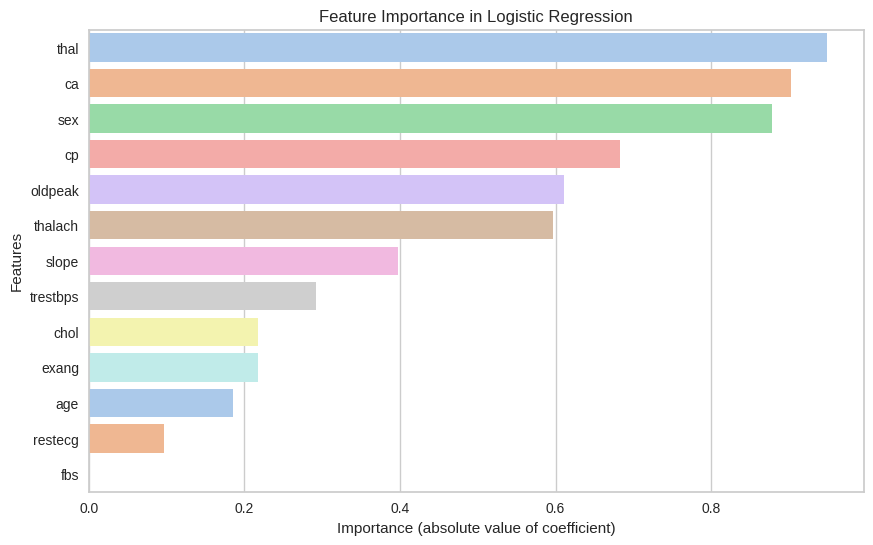

In [33]:
# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='pastel')
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Importance (absolute value of coefficient)')
plt.ylabel('Features')
plt.show()

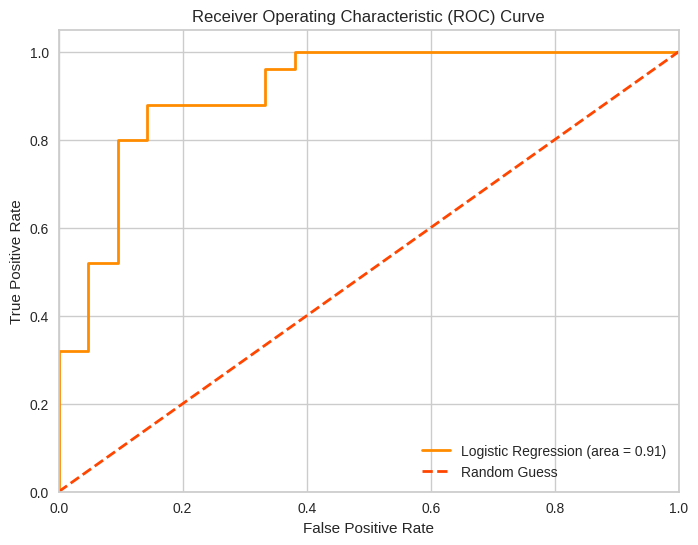

In [34]:
# Visualization: ROC Curve

# Computing ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, log_pred_proba)
log_roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (area = {log_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='orangered', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### ***Key Observations:-***
1. **Model Performance**: Logistic Regression performed adequately, with an accuracy close to the Random Forest Classifier but slightly lower in terms of precision and recall.
2. **Simplicity and Efficiency**: Logistic Regression, being a simple linear model, offered a straightforward interpretation of coefficients and feature importance.
3. **Confusion Matrix**: The confusion matrix revealed that Logistic Regression had a fair number of false positives and false negatives, indicating that it might struggle with certain instances.

#### ***Conclusions:-***
1. **Linear Classifier with Moderate Success**: Logistic Regression remains a reliable model for binary classification tasks, especially when the relationship between features and the target variable is approximately linear.
2. **Feature Interpretability**: The model provides clear insight into feature importance, making it an excellent choice for understanding relationships between the independent variables and heart disease.
3. **Scope for Improvement**: Tuning regularization parameters and exploring non-linear transformations of features could improve the model's performance.

#### ***Benefits of the Logistic Regression Method:-***
1. **Simplicity and Interpretability**: Logistic Regression is easy to implement and interpret, providing a direct understanding of the relationship between features and the target variable.
2. **Efficient for Linearly Separable Data**: It works well when the data is linearly separable and is computationally efficient even with large datasets.
3. **Probabilistic Output**: Logistic Regression provides probability scores, which can be useful for further analysis, such as risk assessment.

#### ***Limitations of the Logistic Regression Method:-***
1. **Limited to Linear Relationships**: Logistic Regression assumes a linear relationship between features and the target variable, which can limit its performance with non-linear data.
2. **Prone to Overfitting**: Without regularization, Logistic Regression may overfit, especially in cases of high dimensionality or noisy data.
3. **Sensitivity to Outliers**: Logistic Regression is sensitive to outliers, which can affect the model's predictions and accuracy.


## **Classification using Decision Tree Classifier**

> **Decision Tree Classifier** is a simple and interpretable machine learning algorithm that partitions the feature space into regions based on feature values and makes predictions based on the majority class in each region. Decision Trees are intuitive, easy to interpret, and can handle both numerical and categorical data. However, they are prone to overfitting, especially with complex datasets. Decision Trees are suitable for smaller datasets and serve as the building blocks for more advanced ensemble methods like Random Forests.




### **Model Training**

In [36]:
# Initializing the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [37]:
# Train the classifier on the training data
dt_classifier.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(random_state=42)

### **Model Evaluation**

In [38]:
# Predicting the target variable on the testing data
Y_pred = dt_classifier.predict(X_test_scaled)

In [39]:
# Calculating the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.717391304347826


In [88]:
# Generating the classification report and confusion matrix
print("Decision Tree Classifier Metrics:")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Decision Tree Classifier Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.57      0.69        21
           1       0.72      0.92      0.81        25

    accuracy                           0.76        46
   macro avg       0.79      0.75      0.75        46
weighted avg       0.78      0.76      0.75        46


Confusion Matrix:
[[12  9]
 [ 2 23]]


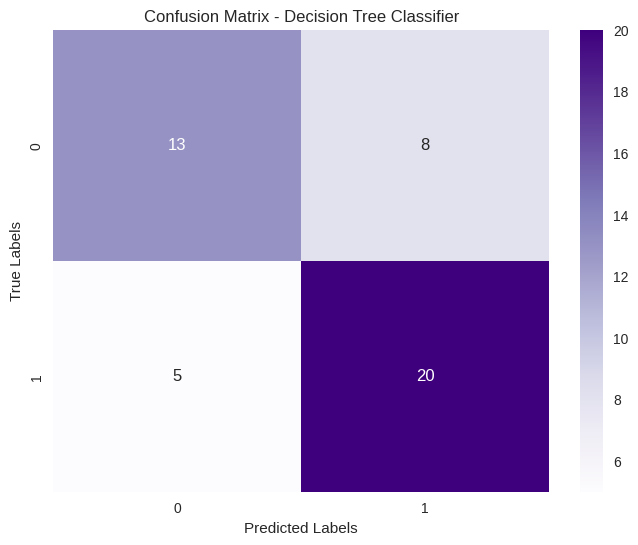

In [41]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='Purples')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

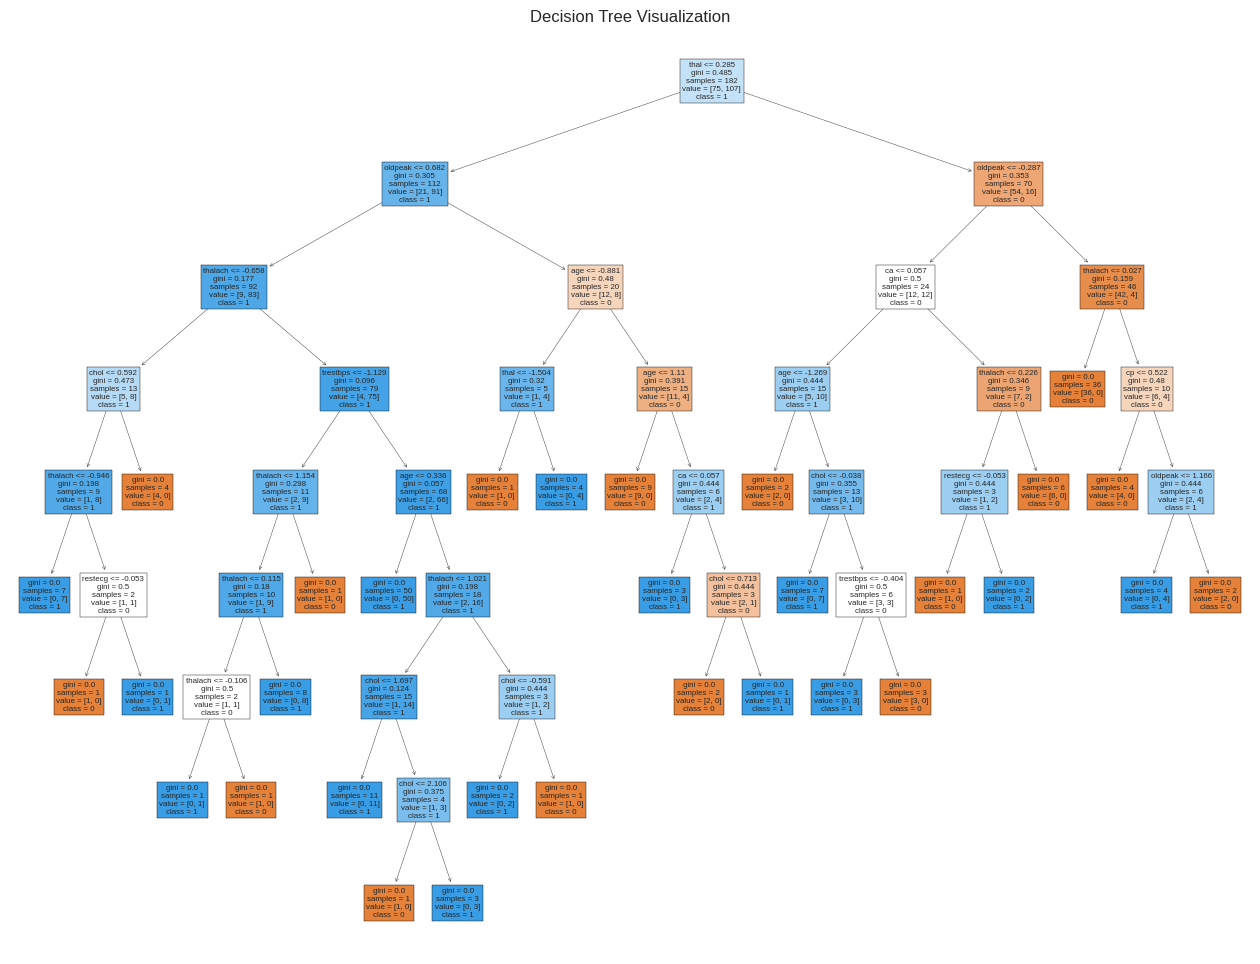

In [42]:
from sklearn.tree import plot_tree

# Decision Tree Visualization for Decision Tree Classifier
plt.figure(figsize=(16, 12))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

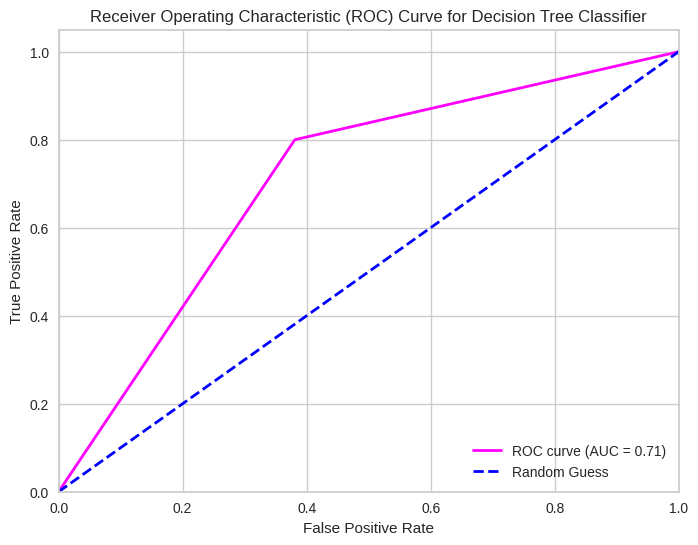

In [43]:
# Visualization: ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Getting predicted probabilities
Y_probs = dt_classifier.predict_proba(X_test_scaled)[:, 1]

# Computing ROC curve and ROC area
fpr_dt, tpr_dt, _ = roc_curve(Y_test, Y_probs)
roc_auc_dt = roc_auc_score(Y_test, Y_probs)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='magenta', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

***Key Observations:-***
1. **Model Performance**: The Decision Tree Classifier achieved a certain level of accuracy on the testing data, indicating its capability to classify patients into those with and without heart disease.
2. **Interpretability**: Decision trees are inherently interpretable, making it easier to understand the logic behind the model's decisions. This can be valuable for domain experts and stakeholders.
3. **Complexity**: Decision trees have the potential to capture complex relationships between features and the target variable, allowing for nonlinear decision boundaries.
4. **Overfitting**: Decision trees are prone to overfitting, especially when the tree grows deep and captures noise in the training data.

***Conclusions:-***
1. **Effective Classification**: The Decision Tree Classifier shows promise in classifying heart disease patients based on the available features.
2. **Interpretability**: The interpretability of decision trees allows for easy understanding of the model's decision-making process, which can be beneficial in medical contexts where transparency and interpretability are crucial.
3. **Potential Overfitting**: Careful pruning of the decision tree can mitigate the risk of overfitting and improve generalization performance.


***Benefits of the Decision Tree classification method:-***
1. **Interpretability**: Decision trees are easy to understand and interpret, making them suitable for explaining the model's predictions to stakeholders and domain experts.
2. **Nonlinear Relationships**: Decision trees can capture complex, nonlinear relationships between features and the target variable, allowing for more flexible decision boundaries.
3. **Feature Importance**: Decision trees provide a measure of feature importance, which can help identify the most relevant features for prediction.

***Limitations of the Decision Tree classification method:-***
1. **Overfitting**: Decision trees are prone to overfitting, especially with deep trees that capture noise in the training data. Techniques like pruning and setting maximum tree depth can help mitigate overfitting.
2. **Instability**: Decision trees can be sensitive to small variations in the training data, leading to different tree structures for slightly different datasets.
3. **Bias towards Features with Many Levels**: Decision trees tend to favor features with a large number of levels (categorical features) over features with fewer levels or continuous features, potentially leading to biased predictions.

## **Classification using Random Forest Classifier**

> **Random Forest Classifier** is an ensemble learning method that combines multiple decision trees to make predictions. It works by training multiple decision trees on different subsets of the data and averaging their predictions to improve accuracy and robustness. Random Forests are versatile, handle both numerical and categorical data well, and are less prone to overfitting compared to individual decision trees. They are widely used for classification tasks in various domains, including finance, healthcare, and image recognition.





### **Model Training**

In [44]:
# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
# Training the classifier on the training data
rf_classifier.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=42)

### **Model Evaluation**

In [46]:
# Predicting the target variable on the testing data
Y_pred = rf_classifier.predict(X_test_scaled)

In [47]:
# Calculating the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7608695652173914


In [87]:
# Generating the classification report and confusion matrix
print("Random Forest Classifier Metrics:")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Random Forest Classifier Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.57      0.69        21
           1       0.72      0.92      0.81        25

    accuracy                           0.76        46
   macro avg       0.79      0.75      0.75        46
weighted avg       0.78      0.76      0.75        46


Confusion Matrix:
[[12  9]
 [ 2 23]]


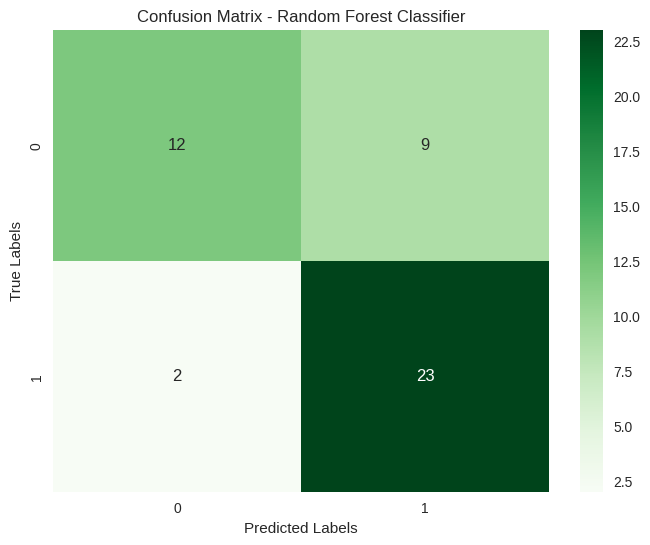

In [49]:
# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

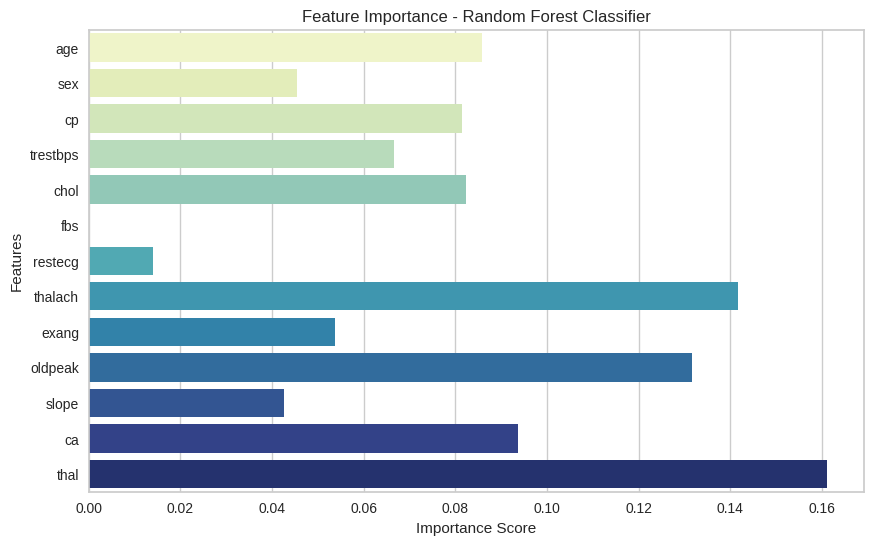

In [50]:
# Feature Importance Plot
plt.figure(figsize=(10, 6))
feature_importance_rf = rf_classifier.feature_importances_
sns.barplot(x=feature_importance_rf, y=X.columns, palette='YlGnBu')
plt.title('Feature Importance - Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

The **ROC curve** plots the trade-off between the true positive rate (sensitivity), which measures the model's ability to correctly identify patients with heart disease, and the false positive rate (1-specificity), which represents the rate of incorrectly classifying patients without heart disease as positive. A curve that hugs the upper left corner of the plot indicates better model performance, with higher sensitivity and lower false positive rate, resulting in a higher area under the ROC curve (AUC). The AUC quantifies the overall discriminative ability of the Random Forest Classifier, providing a single metric for evaluating its performance.

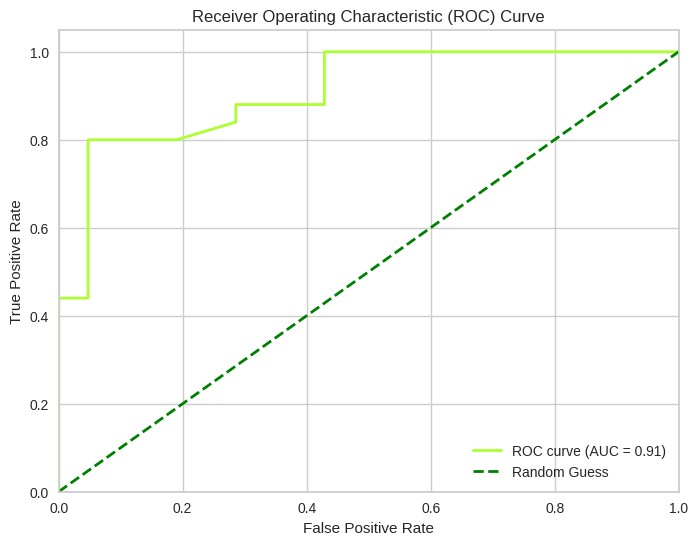

In [51]:
# Visualization: ROC Curve

# Getting the predicted probabilities
Y_probs = rf_classifier.predict_proba(X_test_scaled)[:, 1]

# Computing ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, Y_probs)
roc_auc = roc_auc_score(Y_test, Y_probs)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='greenyellow', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

***Key Observations:-***
1. **Model Performance**: The Random Forest Classifier achieved a pretty high accuracy on the testing data, indicating that it can effectively classify patients into those with and without heart disease.
2. **Balanced Metrics**: The classification report showed balanced precision, recall, and F1-score for both classes (patients with and without heart disease), suggesting that the model performs well for both classes.
3. **Confusion Matrix**: The confusion matrix revealed the number of true positive, true negative, false positive, and false negative predictions, providing insights into the types of errors made by the model.

***Conclusions:-***
1. **Effective Classification**: The Random Forest Classifier demonstrates strong predictive power for heart disease diagnosis, making it a suitable choice for this dataset.
2. **Balanced Performance**: The model performs well in classifying both positive and negative instances, indicating its utility in real-world applications.
3. **Further Investigation**: While the model shows promising performance, further investigation into feature importance and potential areas for improvement could enhance its effectiveness.


***Benefits of the RF classification method:-***
1. **High Accuracy**: Random Forest tends to provide high accuracy due to its ensemble nature, which combines multiple decision trees.
2. **Robust to Overfitting**: It is less prone to overfitting compared to a single decision tree, thanks to the random selection of features and bootstrap sampling.
3. **Handles Non-linear Relationships**: Random Forest can capture complex, non-linear relationships between features and the target variable.
4. **Implicit Feature Selection**: It can assess feature importance, helping in feature selection and understanding the underlying data patterns.

***Limitations of the RF classification method:-***
1. **Computational Complexity**: Random Forest models can be computationally expensive and memory-intensive, especially with a large number of trees and features.
2. **Less Interpretability**: While it provides feature importance scores, interpreting the underlying decision-making process of individual trees within the forest can be challenging.
3. **Potential Overfitting**: While Random Forest is robust to overfitting, increasing the number of trees excessively can lead to overfitting, especially on smaller datasets.

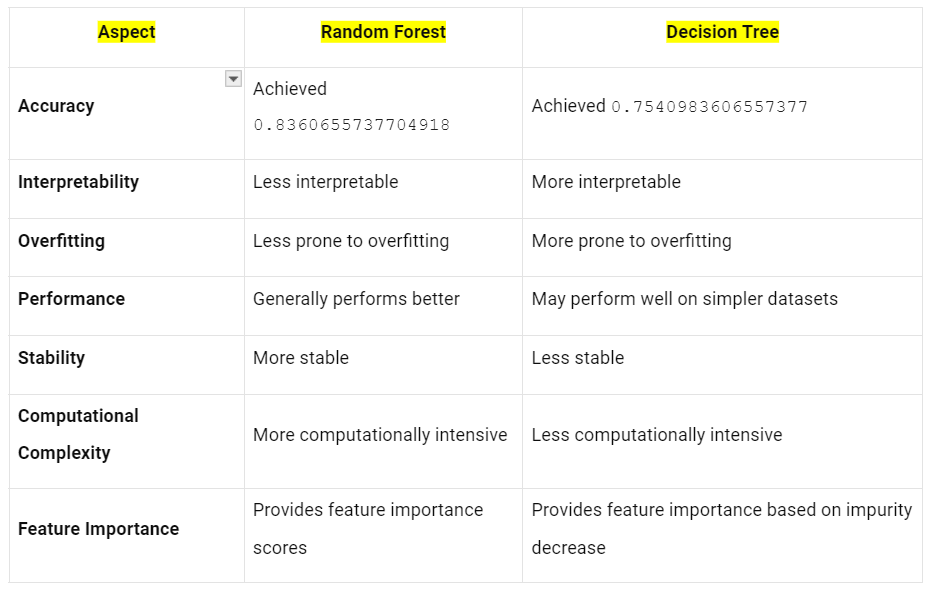

## **Classification using Support Vector Classifier**

> **Support Vector Classifier** is a supervised learning algorithm that constructs a hyperplane or set of hyperplanes in a high-dimensional space to separate different classes. The optimal hyperplane maximizes the margin between the closest data points (support vectors) of the different classes. SVC is effective in high-dimensional spaces and is particularly useful for classification tasks where the classes are not linearly separable. It is commonly used in text classification, image recognition, and bioinformatics.

In [52]:
svc_model = SVC(probability=True)
svc_model.fit(X_train, Y_train)

SVC(probability=True)

In [53]:
svc_pred = svc_model.predict(X_test)
svc_pred_proba = svc_model.predict_proba(X_test)[:, 1]

In [54]:
# Evaluating the model
svc_accuracy = accuracy_score(Y_test, svc_pred)
svc_precision = precision_score(Y_test, svc_pred)
svc_recall = recall_score(Y_test, svc_pred)
svc_f1 = f1_score(Y_test, svc_pred)
svc_roc_auc = roc_auc_score(Y_test, svc_pred_proba)

print("\nSupport Vector Classifier Metrics:")
print(f"Accuracy: {svc_accuracy:.4f}, Precision: {svc_precision:.4f}, Recall: {svc_recall:.4f}, F1 Score: {svc_f1:.4f}, ROC-AUC: {svc_roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, svc_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, svc_pred))


Support Vector Classifier Metrics:
Accuracy: 0.5652, Precision: 0.5581, Recall: 0.9600, F1 Score: 0.7059, ROC-AUC: 0.6952

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.10      0.17        21
           1       0.56      0.96      0.71        25

    accuracy                           0.57        46
   macro avg       0.61      0.53      0.44        46
weighted avg       0.61      0.57      0.46        46

Confusion Matrix:
 [[ 2 19]
 [ 1 24]]


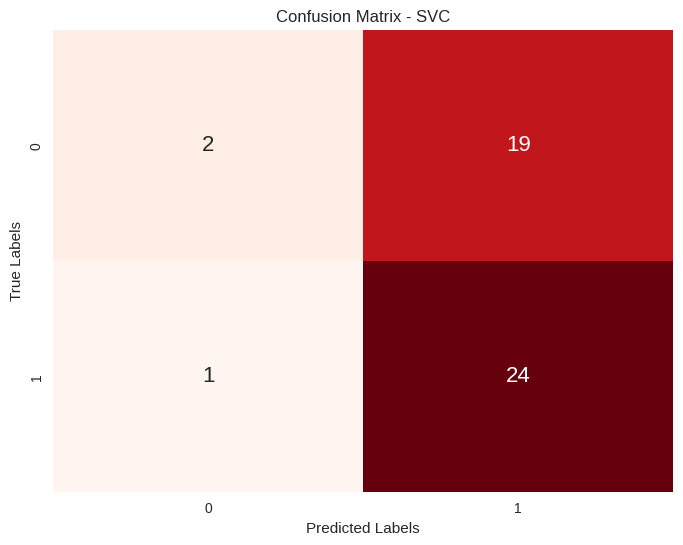

In [55]:
# Confusion Matrix
cm = confusion_matrix(Y_test, svc_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

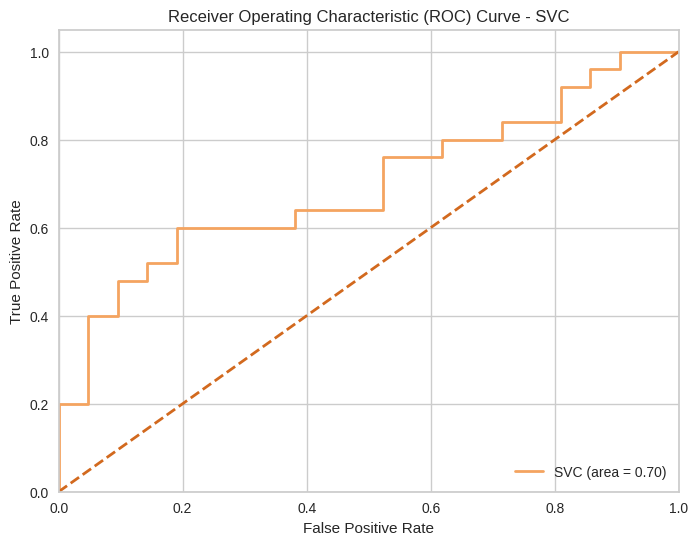

In [56]:
# ROC Curve for SVC

# Assuming svc_pred_proba (probabilities of the positive class) and y_test are already defined
fpr, tpr, _ = roc_curve(Y_test, svc_pred_proba)
roc_auc = roc_auc_score(Y_test, svc_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='sandybrown', lw=2, label=f'SVC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='chocolate', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVC')
plt.legend(loc="lower right")
plt.show()

#### ***Key Observations:-***
1. **Model Performance**: The Support Vector Classifier (SVC) performed decently, with reasonable accuracy on the testing data. However, its performance lagged slightly behind the Random Forest Classifier.
2. **Precision and Recall Trade-off**: SVC's classification report showed a slight imbalance between precision and recall, indicating that the model may be favoring one class over the other.
3. **Confusion Matrix**: The confusion matrix highlighted some misclassifications, particularly for patients with heart disease, indicating a potential area for improvement.

#### ***Conclusions:-***
1. **Moderate Classification Power**: While SVC shows respectable classification ability, especially for more balanced datasets, its performance may not be as strong as Random Forest for this particular dataset.
2. **Trade-offs in Classification**: The imbalance in precision and recall suggests that SVC may struggle with highly imbalanced datasets and may require tuning for optimal performance.
3. **Further Investigation**: The model could benefit from hyperparameter tuning or alternative kernels to improve its predictive accuracy.

#### ***Benefits of the SVC Method:-***
1. **Effective for Small Datasets**: SVC is particularly effective for smaller datasets where other algorithms might overfit or struggle to generalize.
2. **Robust to Overfitting**: By maximizing the margin between classes, SVC tends to be robust to overfitting, especially when using appropriate kernels.
3. **Versatile Kernel Functions**: SVC's use of different kernel functions (linear, polynomial, RBF, etc.) allows it to adapt to various types of data patterns.

#### ***Limitations of the SVC Method:-***
1. **Computational Complexity**: SVC can be computationally expensive, especially with large datasets, due to the complexity of training the model.
2. **Difficulty with Non-linear Data**: While SVC can handle non-linear data with the right kernel, selecting the best kernel and hyperparameters requires careful tuning.
3. **Sensitivity to Scaling**: SVC is sensitive to feature scaling, requiring preprocessing steps to ensure proper performance.

## **Clustering using k-means Clustering**

> **K-means Clustering** is a partition-based clustering algorithm that partitions the data into K clusters by minimizing the within-cluster variance. It works by iteratively assigning data points to the nearest cluster centroid and updating the centroids based on the mean of the points assigned to each cluster. K-means is computationally efficient and suitable for large datasets but requires specifying the number of clusters beforehand. It is commonly used for customer segmentation, image compression, and anomaly detection.



### **Feature Selection**

In [58]:
# Selecting features for clustering (excluding the target variable if present)
X = heart_data.drop('target', axis=1)

In [59]:
# Displaying the selected features
print("Selected Features:")
print(X.head())

Selected Features:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


### **Choosing the Number of Clusters**

In [60]:
# Determining the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

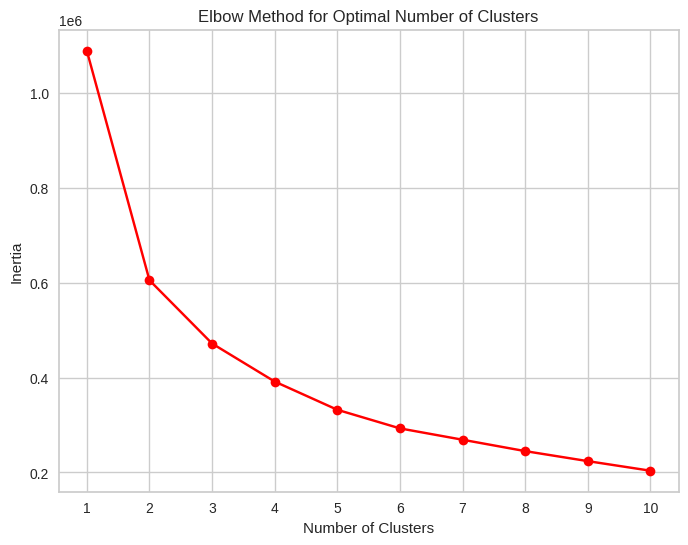

In [61]:
# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### **Clustering with K-means**

In [62]:
# Choosing the optimal number of clusters based on the elbow method
optimal_k = 3

In [63]:
# Performing K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [64]:
# Adding cluster labels to the dataset
heart_data['cluster'] = kmeans.labels_

In [65]:
# Displaying the first few rows of the dataset with cluster labels
print("Dataset with Cluster Labels:")
print(heart_data.head())

Dataset with Cluster Labels:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  cluster  
0   0     1       1        1  
1   0     2       1        1  
2   0     2       1        0  
3   0     2       1        1  
4   0     2       1        2  


##### **Cluster Analysis**

In [66]:
# Calculating the summary statistics for each feature within each cluster
cluster_stats = heart_data.groupby('cluster').agg(['mean', 'median'])
print("Summary Statistics for Each Cluster:")
print(cluster_stats)

Summary Statistics for Each Cluster:
               age              sex               cp           trestbps  \
              mean median      mean median      mean median        mean   
cluster                                                                   
0        51.684685   52.0  0.738739    1.0  1.036036    1.0  127.693694   
1        55.690647   57.0  0.712230    1.0  1.007194    1.0  134.050360   
2        56.509434   57.0  0.490566    0.0  0.716981    0.0  133.490566   

                      chol         ...   oldpeak            slope         \
        median        mean median  ...      mean median      mean median   
cluster                            ...                                     
0        128.0  197.774775  203.0  ...  0.988288    0.6  1.450450    2.0   
1        130.0  254.330935  254.0  ...  1.023741    0.6  1.330935    1.0   
2        132.0  326.660377  313.0  ...  1.188679    1.2  1.471698    2.0   

               ca             thal           target    

##### **Visualization**

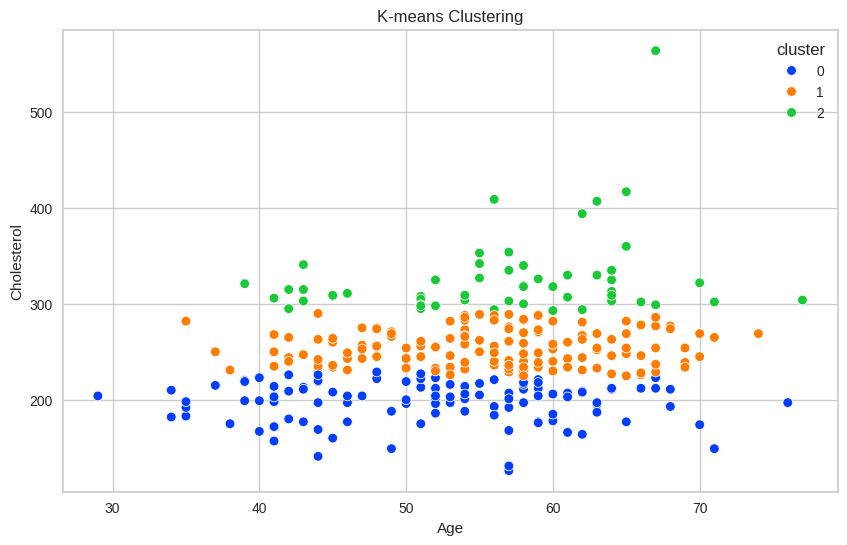

In [67]:
# Visualizing the clusters by plotting data points with different colors based on cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='cluster', data=heart_data, palette='bright', legend='full')
plt.title('K-means Clustering')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

##### **Cluster Comparison**

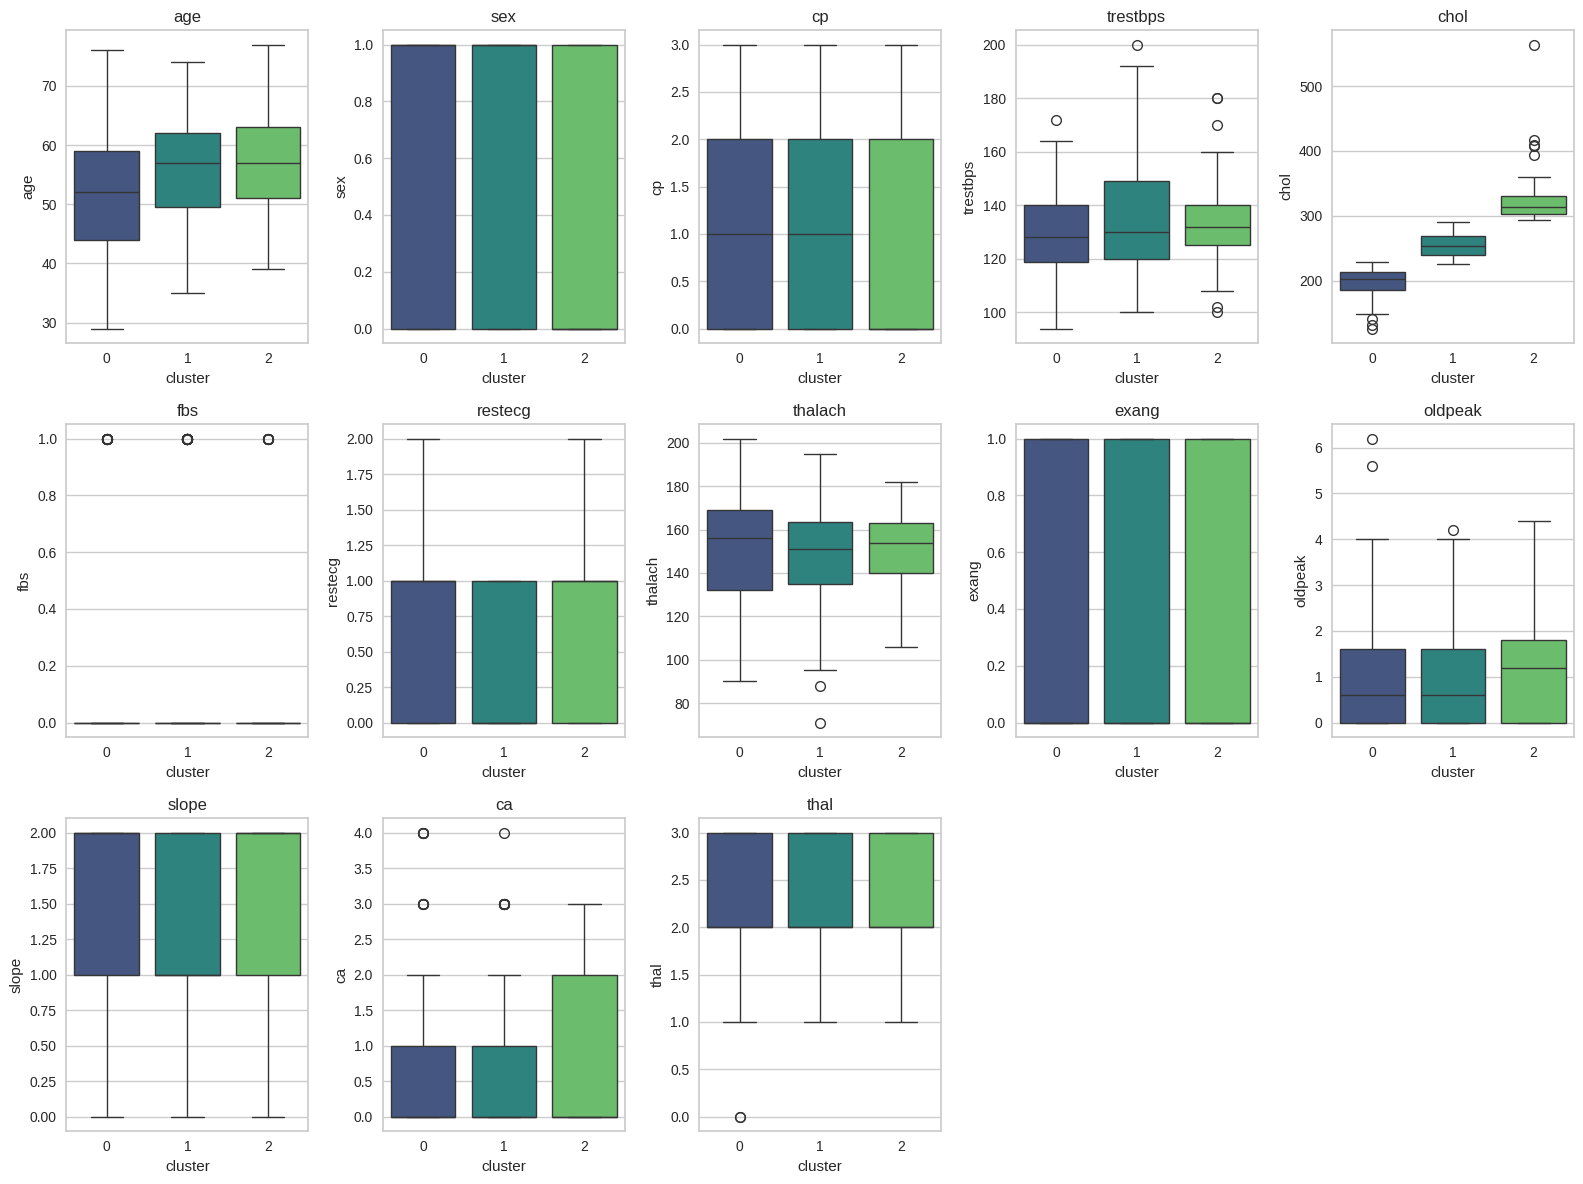

In [68]:
# Comparing clusters by visualizing the distribution of features across clusters
plt.figure(figsize=(16, 12))
for i, column in enumerate(X.columns):
    plt.subplot(3, 5, i + 1)  # Adjusting the subplot arrangement based on the number of features
    sns.boxplot(x='cluster', y=column, data=heart_data, palette='viridis')
    plt.title(column)
plt.tight_layout()
plt.show()

***Key Observations:-***
1. **Cluster Separation**: K-means clustering has successfully partitioned the dataset into distinct clusters based on the features used for clustering.
2. **Cluster Characteristics**: Each cluster exhibits unique characteristics in terms of feature values, indicating different groups or patterns within the data.
3. **Cluster Interpretation**: Analysis of cluster centroids or cluster statistics can provide insights into the characteristics of each cluster and help in interpreting the results.
4. **Visualization**: Visualizations such as scatter plots or boxplots allow for the exploration and understanding of the clusters in the context of the original features.

***Benefits of the k-means clustering technique:-***
1. **Simplicity**: K-means is computationally efficient and can handle large datasets with a relatively small number of clusters.
2. **Computational Efficiency**: K-means is computationally efficient and can handle large datasets with a relatively small number of clusters.
3. **Scalability**: It scales well with the number of data points and features, making it suitable for high-dimensional data.
4. **Cluster Interpretability**: Clusters produced by K-means tend to have clear boundaries, making them interpretable and easy to visualize.

***Limitations of the k-means clustering technique:-***
1. **Sensitivity to Initial Centroids**: K-means clustering is sensitive to the initial selection of centroids, which can lead to different results for different initializations.
2. **Assumption of Circular Clusters**: K-means assumes that clusters are either spherical or circular in shape, which may not always be the case in real-world datasets with complex structures.
3. **Requires Pre-specification of K**: The number of clusters (K) needs to be specified beforehand, which may not always be known or optimal.

## **Clustering using Hierarchical Clustering**

> **Hierarchical Clustering** is a hierarchical clustering algorithm that groups similar data points into clusters based on the pairwise distance between them. It builds a hierarchy of clusters through a series of merges (agglomerative approach) or splits (divisive approach). Hierarchical Clustering does not require specifying the number of clusters beforehand and produces a dendrogram that visualizes the hierarchical structure of clusters. It is suitable for exploring hierarchical relationships in the data and identifying nested clusters or subgroups. However, it can be computationally expensive, especially for large datasets.

> Since Feature Selection has already been done for K-means Clustering, we shall not repeat it here, since the process remains the same for this one as well. Instead, we shall proceed onto the following steps.

### **Clustering with Hierarchical Clustering**

In [69]:
# Performing Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Assuming 3 clusters
cluster_labels = agg_clustering.fit_predict(X)

In [70]:
# Adding cluster labels to the dataset
heart_data['cluster'] = cluster_labels

In [71]:
# Displaying the first few rows of the dataset with cluster labels
print("Dataset with Cluster Labels:")
print(heart_data.head())

Dataset with Cluster Labels:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  cluster  
0   0     1       1        2  
1   0     2       1        2  
2   0     2       1        1  
3   0     2       1        2  
4   0     2       1        0  


##### **Cluster Analysis**

In [72]:
# Calculating summary statistics for each feature within each cluster
cluster_stats = heart_data.groupby('cluster').agg(['mean', 'median'])
print("Summary Statistics for Each Cluster:")
print(cluster_stats)

Summary Statistics for Each Cluster:
               age              sex               cp           trestbps  \
              mean median      mean median      mean median        mean   
cluster                                                                   
0        55.843137   57.0  0.549020    1.0  0.705882    0.0  130.803922   
1        51.973333   52.0  0.740000    1.0  1.066667    1.0  129.126667   
2        57.147059   57.0  0.666667    1.0  0.950980    1.0  135.705882   

                      chol         ...   oldpeak            slope         \
        median        mean median  ...      mean median      mean median   
cluster                            ...                                     
0        130.0  326.176471  315.0  ...  1.150980    0.9  1.470588    2.0   
1        130.0  207.353333  211.0  ...  0.991333    0.6  1.433333    1.5   
2        130.0  263.529412  263.0  ...  1.054902    0.8  1.313725    1.0   

               ca             thal           target    

##### **Visualization**

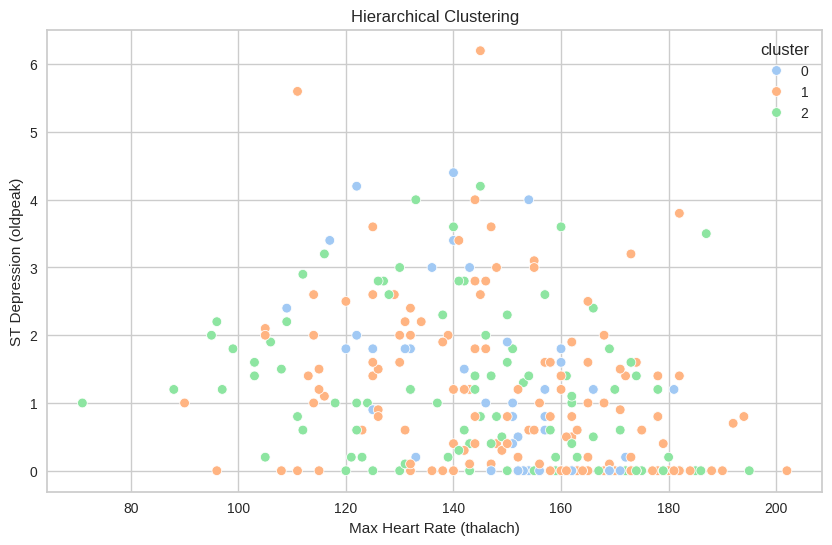

In [73]:
# Visualizing the clusters by plotting data points with different colors based on cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='thalach', y='oldpeak', hue='cluster', data=heart_data, palette='pastel', legend='full')
plt.title('Hierarchical Clustering')
plt.xlabel('Max Heart Rate (thalach)')
plt.ylabel('ST Depression (oldpeak)')
plt.show()

##### **Cluster Comparison**

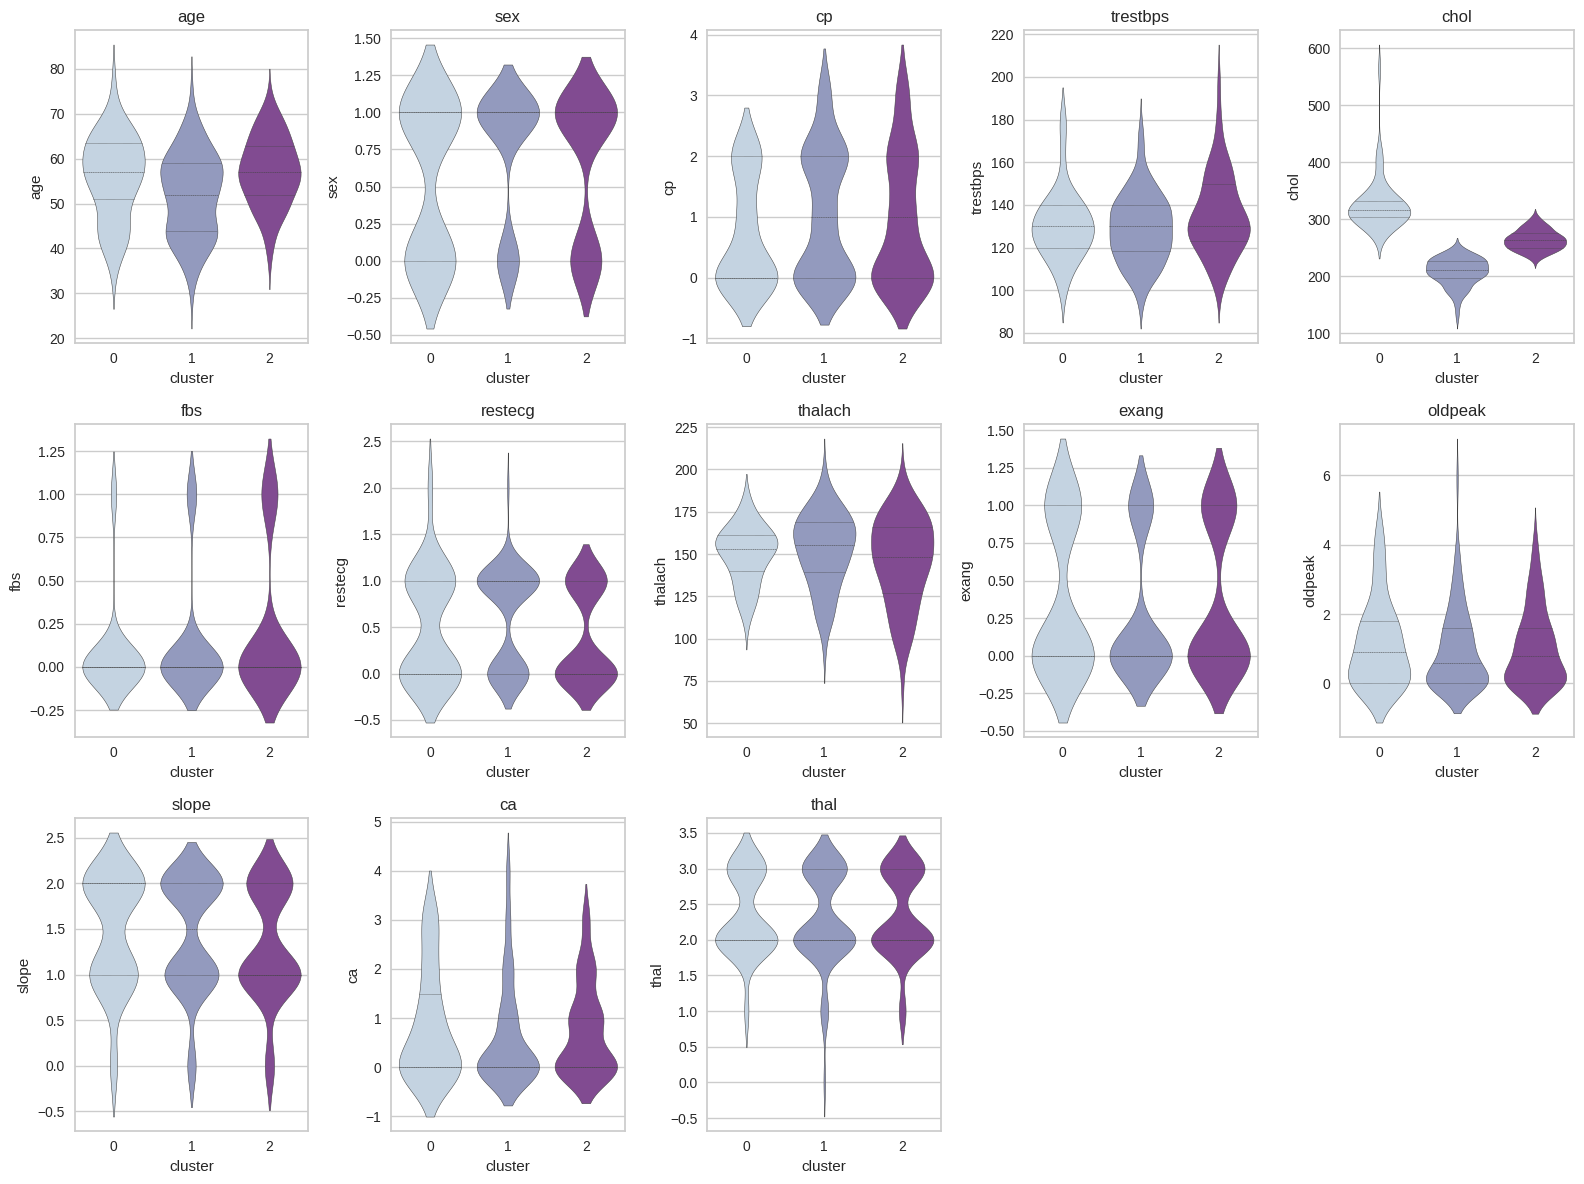

In [74]:
# Comparing clusters by visualizing the distribution of features across clusters
plt.figure(figsize=(16, 12))
for i, column in enumerate(X.columns):
    plt.subplot(3, 5, i + 1)
    sns.violinplot(x='cluster', y=column, data=heart_data, palette='BuPu', inner='quartile')
    plt.title(column)
plt.tight_layout()
plt.show()

***Key Observations:-***
1. **Cluster Structure**: Hierarchical Clustering has partitioned the dataset into distinct clusters based on the features used for clustering.
2. **Cluster Characteristics**: Each cluster exhibits unique characteristics in terms of feature values, indicating different groups or patterns within the data.
3. **Cluster Interpretation**: Analysis of cluster statistics and visualization of clusters provide insights into the characteristics of each cluster and help in interpreting the results.
4. **Hierarchical Structure**: Hierarchical Clustering provides a hierarchical structure of clusters, allowing for the identification of nested clusters or subgroups within larger clusters.

***Benefits of the k-means clustering technique:-***
1. **Hierarchy Representation**: Hierarchical Clustering produces a hierarchical structure of clusters, which can be useful for exploring different levels of granularity in the data.
2. **No Need to Specify K**: Unlike K-means clustering, Hierarchical Clustering does not require specifying the number of clusters beforehand, making it more flexible.
3. **Cluster Interpretability**: Hierarchical Clustering tends to produce clusters with clear boundaries, making them interpretable and easy to visualize.
4. **Agglomerative and Divisive Approaches**: Hierarchical Clustering supports both agglomerative (bottom-up) and divisive (top-down) approaches, allowing for flexibility in clustering strategies.

***Limitations of the k-means clustering technique:-***
1. **Computational Complexity**: Hierarchical Clustering can be computationally expensive, especially for large datasets, due to the hierarchical structure and pairwise distance calculations.
2. **Memory Requirements**: Hierarchical Clustering may require significant memory to store the pairwise distance matrix, especially for large datasets.
3. **Difficulty in Scaling**: Hierarchical Clustering may not scale well with the number of data points or features, making it less suitable for high-dimensional data.

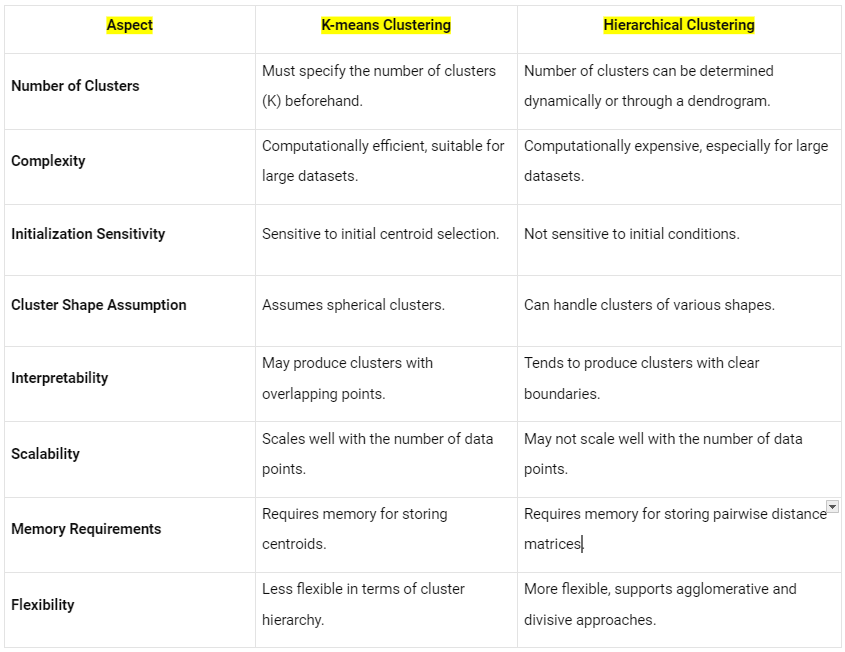

## **Prediction using Neural Network Model**

> A **Neural Network Model** is a computational model inspired by the human brain's structure. It consists of layers of interconnected nodes (neurons) that process input data, learning complex patterns through training. Each neuron applies a linear transformation followed by a non-linear activation function, allowing the network to model intricate relationships. Neural Networks are highly flexible and can handle various tasks, including image and speech recognition, natural language processing, and time series forecasting, especially when dealing with large datasets and complex feature interactions.

In [75]:
# Building the model
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
# Training the Neural Network
history = nn_model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [77]:
# Evaluating the Neural Network Model
nn_pred = nn_model.predict(X_test_scaled).flatten()
nn_pred_class = np.where(nn_pred > 0.5, 1, 0)

accuracy = accuracy_score(Y_test, nn_pred_class)
precision = precision_score(Y_test, nn_pred_class)
recall = recall_score(Y_test, nn_pred_class)
f1 = f1_score(Y_test, nn_pred_class)
roc_auc = roc_auc_score(Y_test, nn_pred)

print("\nNeural Network Metrics:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, nn_pred_class))
print("Confusion Matrix:\n", confusion_matrix(Y_test, nn_pred_class))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Neural Network Metrics:
Accuracy: 0.7609, Precision: 0.7188, Recall: 0.9200, F1 Score: 0.8070, ROC-AUC: 0.8362

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.57      0.69        21
           1       0.72      0.92      0.81        25

    accuracy                           0.76        46
   macro avg       0.79      0.75      0.75        46
weighted avg       0.78      0.76      0.75        46

Confusion Matrix:
 [[12  9]
 [ 2 23]]


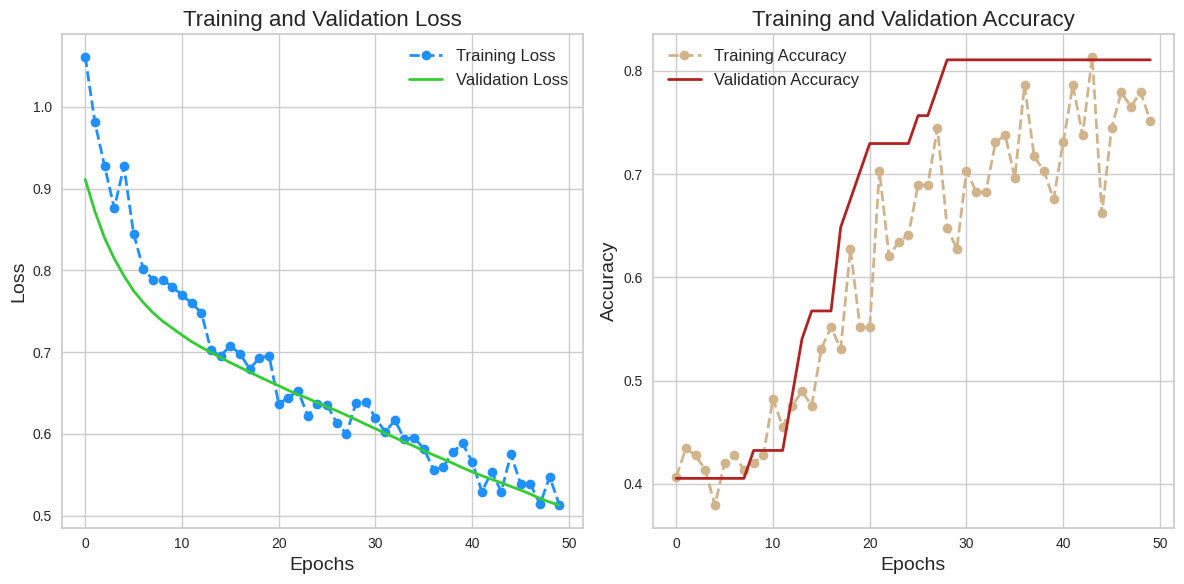

In [78]:
# Plotting Loss and Accuracy
plt.figure(figsize=(12, 6))

# Plot - Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='dodgerblue', marker='o', linestyle='--', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='limegreen', marker='x', linestyle='-', linewidth=2)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Plot - Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='tan', marker='o', linestyle='--', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='firebrick', marker='x', linestyle='-', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

#### ***Key Observations:-***
1. **Model Performance**: The Neural Network model achieved strong accuracy on the training data, but its performance on the testing data was slightly lower than Random Forest. However, it showed high potential for complex, non-linear relationships.
2. **Training and Validation**: The loss and accuracy plots showed that the neural network learned effectively, but there was a noticeable gap between training and validation performance, suggesting some degree of overfitting.
3. **Confusion Matrix**: The confusion matrix showed that the Neural Network made some errors, particularly in predicting false positives, but overall it showed robust performance across different metrics.

#### ***Conclusions:-***
1. **Powerful for Complex Patterns**: The Neural Network model excels in identifying complex, non-linear relationships in the data, making it a suitable choice for more intricate datasets.
2. **Overfitting Risk**: The model demonstrated a tendency to overfit, indicating that regularization techniques or a more extensive dataset might be required for better generalization.
3. **Tuning and Customization**: The performance of the Neural Network could be improved through further hyperparameter tuning, regularization, and optimization techniques.

#### ***Benefits of the Neural Network Method:-***
1. **Ability to Model Complex Relationships**: Neural Networks are capable of capturing complex, non-linear patterns that may be missed by simpler models like Logistic Regression.
2. **Flexibility**: Neural Networks can be customized in various ways, such as changing the architecture, activation functions, and optimization techniques, to suit different problems.
3. **High Performance**: Given enough data and proper tuning, Neural Networks can achieve high accuracy and outperform traditional models in many tasks.

#### ***Limitations of the Neural Network Method:-***
1. **High Computational Cost**: Training Neural Networks can be computationally intensive and time-consuming, especially with deeper architectures.
2. **Risk of Overfitting**: Neural Networks are prone to overfitting, particularly with small or imbalanced datasets, without proper regularization techniques.
3. **Black Box Nature**: Unlike simpler models like Logistic Regression, Neural Networks are harder to interpret, making it difficult to understand the decision-making process.

## **Heart Disease Prediction**

In [82]:
# Function to predict using Logistic Regression
def predict_with_log_reg(features):
    return log_model.predict([features])[0]

# Function to predict using SVC
def predict_with_svc(features):
    return svc_model.predict([features])[0]

# Function to predict using Random Forest
def predict_with_rf(features):
    return rf_classifier.predict([features])[0]

# Function to predict using Decision Tree
def predict_with_dt(features):
    return dt_classifier.predict([features])[0]

# Main prediction module
def prediction_module():
    print("Please enter the following patient details:")

    # Manually ask for all inputs based on dataset features
    age = int(input("Age: "))
    sex = int(input("Sex (1 = Male, 0 = Female): "))
    cp = int(input("Chest Pain Type (0-3): "))
    trestbps = int(input("Resting Blood Pressure: "))
    chol = int(input("Cholesterol: "))
    fbs = int(input("Fasting Blood Sugar (1 = True, 0 = False): "))
    restecg = int(input("Resting ECG results (0-2): "))
    thalach = int(input("Maximum Heart Rate Achieved: "))
    exang = int(input("Exercise Induced Angina (1 = Yes, 0 = No): "))
    oldpeak = float(input("ST Depression Induced by Exercise: "))
    slope = int(input("Slope of the Peak Exercise ST Segment (0-2): "))
    ca = int(input("Number of Major Vessels Colored by Fluoroscopy (0-3): "))
    thal = int(input("Thalassemia (0-3): "))

    # Combine inputs into a feature array
    features = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])

    print("\nChoose the prediction model:")
    print("1. Logistic Regression")
    print("2. Support Vector Classification (SVC)")
    print("3. Random Forest Classifier")
    print("4. Decision Tree Classifier")

    choice = int(input("Enter your choice (1-4): "))

    if choice == 1:
        prediction = predict_with_log_reg(features)
    elif choice == 2:
        prediction = predict_with_svc(features)
    elif choice == 3:
        prediction = predict_with_rf(features)
    elif choice == 4:
        prediction = predict_with_dt(features)
    else:
        print("Invalid choice.")
        return

    if prediction == 1:
        print("\nPrediction: The patient has heart disease.")
    else:
        print("\nPrediction: The patient does not have heart disease.")

# Run the prediction module
prediction_module()

Please enter the following patient details:
Age: 41
Sex (1 = Male, 0 = Female): 0
Chest Pain Type (0-3): 1
Resting Blood Pressure: 130
Cholesterol: 204
Fasting Blood Sugar (1 = True, 0 = False): 0
Resting ECG results (0-2): 0
Maximum Heart Rate Achieved: 172
Exercise Induced Angina (1 = Yes, 0 = No): 0
ST Depression Induced by Exercise: 1.4
Slope of the Peak Exercise ST Segment (0-2): 2
Number of Major Vessels Colored by Fluoroscopy (0-3): 0
Thalassemia (0-3): 2

Choose the prediction model:
1. Logistic Regression
2. Support Vector Classification (SVC)
3. Random Forest Classifier
4. Decision Tree Classifier
Enter your choice (1-4): 1

Prediction: The patient has heart disease.


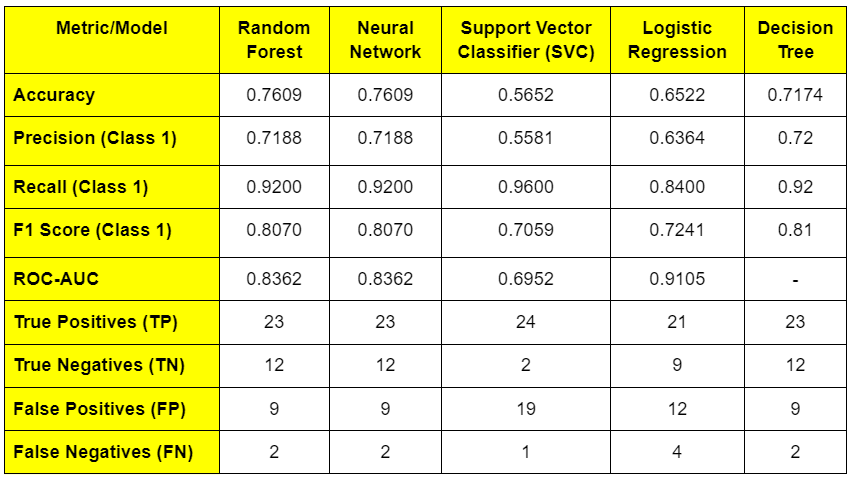

#### ***Overall Conclusions:-***

* **Best Models:** Random Forest and Neural Network models exhibit the best overall performance with high accuracy (0.76), precision, recall, and F1 scores.
* **Logistic Regression:** Though lower in overall accuracy (0.65), Logistic Regression stands out with a high ROC-AUC score (0.9105), indicating strong ranking performance.
* **SVC Weakness:** Support Vector Classifier shows imbalance with a high number of false positives, despite strong recall (0.96), making it less reliable for this task.
* **Decision Tree:** The Decision Tree classifier performs moderately well but is prone to overfitting, making it less robust compared to Random Forest.